<a href="https://colab.research.google.com/github/Clarke-Henshaw-Miles/extra/blob/master/GW%20PROJECT/SimulateChiEff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simulating events:
- All with exactly 0 chi effective which is x_true
- Variation between xhat and x true = quantifying uncertainty
- Generating lots of signals e.g 100 events would expect 10 at 10% outlier and 1 at 1% outlier

  - Chi eff = 0
  - Sigma = 0.1
  
Generate 100 events - plot and analyse - stick gaussian around point - then histogram then stick real events over the top.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  # For Gaussian distribution

# Parameters
n_signals = 100 # Number of signals
true_chi_eff = 0 # All signals have chi_eff = 0
sigma = 0.1  # Standard deviation of the Gaussian error

# Generate "estimated" chi_eff values (xhat) with Gaussian errors
estimated_chi_eff_values = np.random.normal(true_chi_eff, sigma, n_signals)

# Calculate the differences (xhat - xtrue)
differences = estimated_chi_eff_values - true_chi_eff

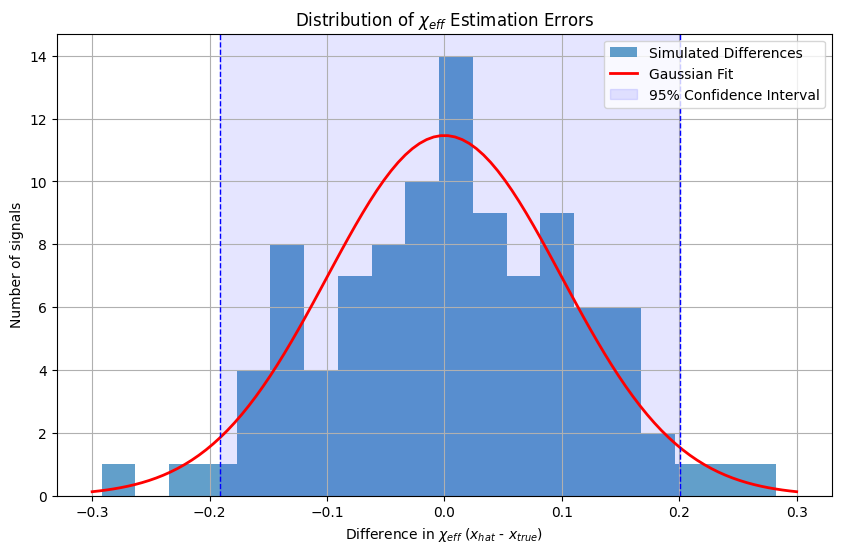

In [10]:
# Create histogram of differences
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(differences, bins=20, alpha=0.7, label="Simulated Differences")

# Gaussian distribution overlay
# JUST PLOTTING THE GAUSSIAN ON TOP RATHER THAN ACTUALLY FITTING IT - NEED TO CHANGE THIS!!!!
x_values = np.linspace(-3*sigma, 3*sigma, 100)  # Range for Gaussian plot
gaussian_values = stats.norm.pdf(x_values, 0, sigma)  # Gaussian PDF

# Scale the Gaussian to the histogram:
# Get the width of the histogram bins
bin_width = bins[1] - bins[0]
# Calculate the area of each bin (n is the count in each bin)
bin_areas = n * bin_width
# Scale the Gaussian so its total area matches the sum of the bin areas
gaussian_scaled = gaussian_values * sum(bin_areas) * (3*sigma - (-3*sigma)) / (x_values.max() - x_values.min())

plt.plot(x_values, gaussian_scaled, 'r-', linewidth=2, label="Gaussian Fit")

# Calculate the 95% confidence interval for a normal distribution
z_score_95 = 1.96  # For a two-tailed 95% CI
margin_of_error = z_score_95 * sigma

lower_bound = np.mean(differences) - margin_of_error
upper_bound = np.mean(differences) + margin_of_error

# Plot the confidence interval as a shaded region with dashed lines at edges
plt.axvspan(lower_bound, upper_bound, color='b', alpha=0.1, label="95% Confidence Interval")  # alpha for transparency
plt.axvline(lower_bound, color='b', linestyle='--', linewidth=1)
plt.axvline(upper_bound, color='b', linestyle='--', linewidth=1)

# Format plot
plt.xlabel("Difference in $\chi_{eff}$ ($x_{hat}$ - $x_{true}$)")
plt.ylabel("Number of signals")
plt.title("Distribution of $\chi_{eff}$ Estimation Errors")
plt.legend()
plt.grid()

Above is simulation of 100 events all with true chi_eff=0 with a sigma=0.1.

A gaussian has been fitted to the data and a 95% confidence interval has been added to identify the outliers.

In [3]:
# Outlier Calculation
outlier_10 = np.sum(np.abs(differences) > 0.1) / n_signals * 100
outlier_1 = np.sum(np.abs(differences) > 0.01) / n_signals * 100

print(f"Percentage of 10% outliers: {outlier_10:.2f}%")
print(f"Percentage of 1% outliers: {outlier_1:.2f}%")


# Statistical Analysis
mean_diff = np.mean(differences)
std_diff = np.std(differences)

print(f"Mean difference: {mean_diff:.4f}")
print(f"Standard deviation of difference: {std_diff:.4f}")

Percentage of 10% outliers: 37.00%
Percentage of 1% outliers: 91.00%
Mean difference: 0.0047
Standard deviation of difference: 0.1076


### NEXT STEPS:

- Plot the real data over the top and compare with results from this simulation.
- Download all the files for these and plot a histogram of chi effective for all these chosen events using my previously developed code.